# Two Sigma Connect: Rental Listing Inquiries

This notebook is my first pass at the data for the [Two Sigma Connect competition on Kaggle](https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries). 

## Import packages and data

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [221]:
train = pd.read_json('train.json')
test = pd.read_json('test.json')

In [8]:
print train.shape
train.sample(3)

(49352, 15)


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
94801,1.0,3,f0905d1d900774e3c970ced1f1e90fdd,2016-04-09 05:36:54,This 3 bedroom is located in the heart of the ...,3rd Ave.,"[Dining Room, Balcony, Garden/Patio, Loft, Ter...",low,40.7313,6849830,-73.9889,781c05e464ce94eaa436401d07f2a6cc,[https://photos.renthop.com/2/6849830_7a370f4d...,5400,64 3rd Ave.
113145,1.0,1,aad464f417fe4c21d8006d7af825cf01,2016-04-09 01:41:56,,West 60th Street,"[Doorman, Fitness Center, Pool, Elevator, Gara...",low,40.7701,6846689,-73.9859,62b685cc0d876c3a1a51d63a0d6a8082,[],3600,124 West 60TH Street
42654,1.0,2,f6ef6e2269d702dacbb40e81daac620f,2016-06-01 05:30:37,BRAND NEW RENOVATED 2 BEDROOM in UPPER EAST SI...,East 88th Street,"[Pre-War, Dishwasher, Hardwood Floors, No Fee]",medium,40.7792,7091709,-73.9511,537e06890f6a86dbb70c187db5be4d55,[https://photos.renthop.com/2/7091709_32af6393...,2895,238 East 88th Street


In [14]:
for x in train.columns: print x + ' ||', 

bathrooms || bedrooms || building_id || created || description || display_address || features || interest_level || latitude || listing_id || longitude || manager_id || photos || price || street_address ||


In [17]:
sns.set_style('whitegrid')

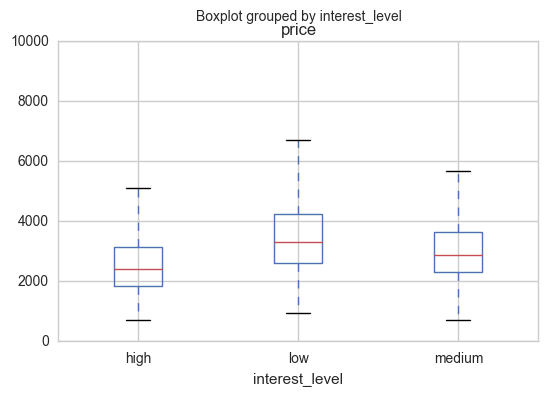

In [27]:
train[(train.price>500)&(train.price<10000)].boxplot(column='price', by='interest_level')

# Interest Level

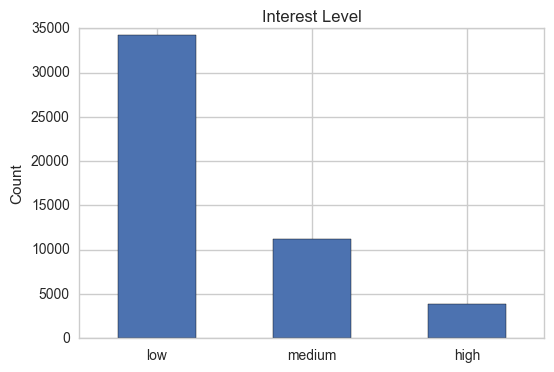

In [39]:
train.interest_level.value_counts().plot(kind='bar', title='Interest Level', rot=0)
plt.ylabel('Count')

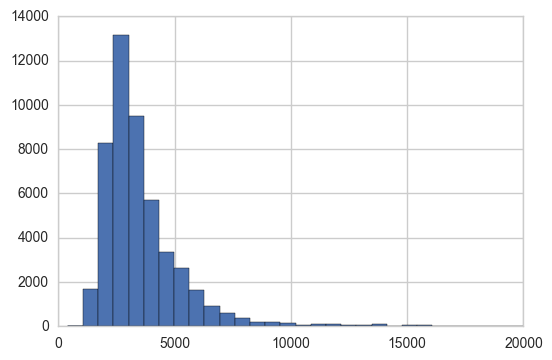

In [105]:
train[(train.price<20000)&(train.price>400)].price.hist(bins=30)

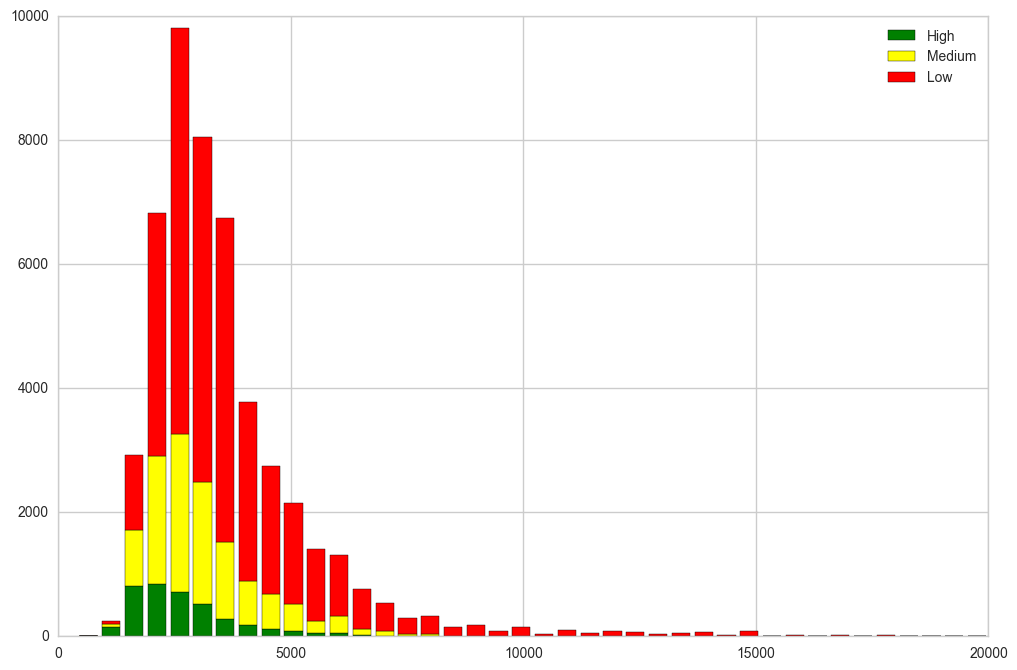

In [125]:
train_=train[(train.price<20000)&(train.price>400)]
high=train_[train_.interest_level=="high"]
medium=train_[train_.interest_level=="medium"]
low=train_[train_.interest_level=="low"]
plt.figure(figsize=(12,8))
_ = plt.hist([high.price, medium.price, low.price], stacked=True, color=['green', 'yellow', 'red'], bins=40)
plt.legend(['High', 'Medium', 'Low'])

In [51]:
train_ = train[(train.price>500)&(train.price<20000)&(train.interest_level=="medium")]

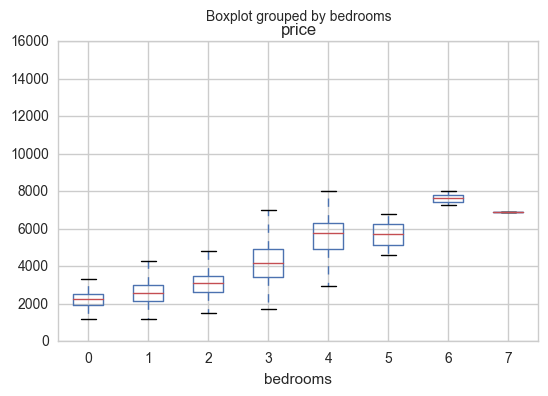

In [52]:
train_.boxplot(column='price', by='bedrooms')

In [95]:
train['interest_level_int'] = train.interest_level.map({'low':1, 'medium':2, 'high':3})
location = train.loc[(train.latitude>40.5)&(train.latitude<40.9)&(train.longitude>-74.1)&(train.longitude<-73.7)]

In [96]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [100]:
from bokeh.charts import Scatter, show
p = Scatter(location, x='longitude', y='latitude', color='interest_level_int', title="Interest Level by Coordinates",
            xlabel="X", ylabel="Y")
show(p)

In [133]:
all_features = []
for desc in train.features:
    for feature in desc:
        all_features.append(feature.lower())

In [134]:
len(set(all_features))

1294

In [136]:
for x in list(set(all_features)): print x + ' ||', 

photos of actual apartment || ** extravagant east village! * massive 4br mansion * 2 full baths * gourmet kitchen * roomy closets ** || complimentary sunday brunch || sundeck with bbq grills || party room || private shuttle || spacious layout || cable ready || private garden || recent renovation || on-site parking available || private-outdoor-space || private roof access || julian balcony || wine cooler || granite counter tops || built-in breakfast bar || decorative fireplace || custom lighting || move-in coordination || new marble bathroom || oversized closet || ** no fee baby! * massive 2br w/terrace * gourmet ss kitchen * elev/lndry bldg * scenic roof deck * 3 blks to train ** || landlord paying for all utilities! tenant pays for cable / tv / internet. || ** chic chelsea find! * massive 4br home * 2 full baths * chef inspired kitchen * elev that opens into apt * cats ok ** || central air || storage in building included! || full-time doorman || laundry facility on every floor || larg

In [137]:
train['photo_count'] = [len(x) for x in train.photos]

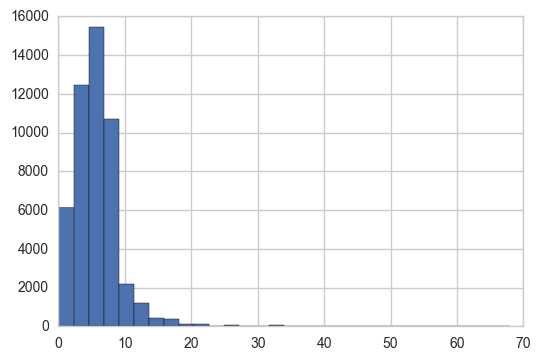

In [139]:
train.photo_count.hist(bins=30)

(0, 6000)

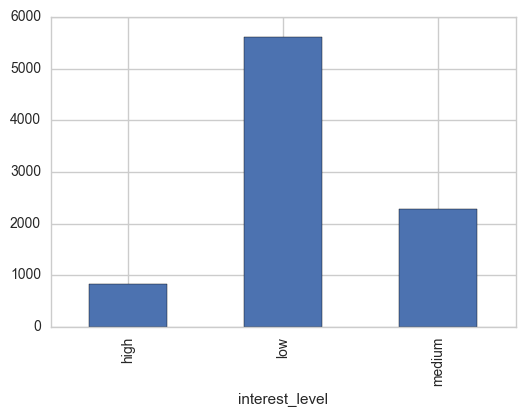

In [173]:
train[train.photo_count==5].groupby('interest_level').price.count().plot(kind='bar')
plt.ylim((0,6000))

In [184]:
train['desc_len'] = [len(x.split(' ')) for x in train.description]

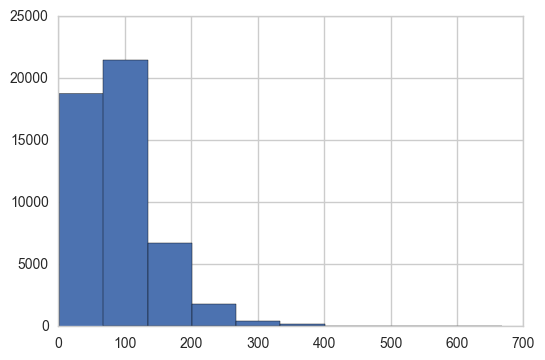

In [185]:
train.desc_len.hist()

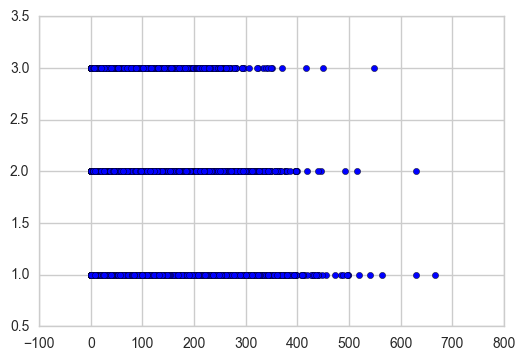

In [186]:
plt.scatter(train.desc_len, train.interest_level_int,)

In [191]:
train[['description', 'interest_level']].sample(1)

,description,interest_level
56267,If the perfect combination of modern luxury an...,low


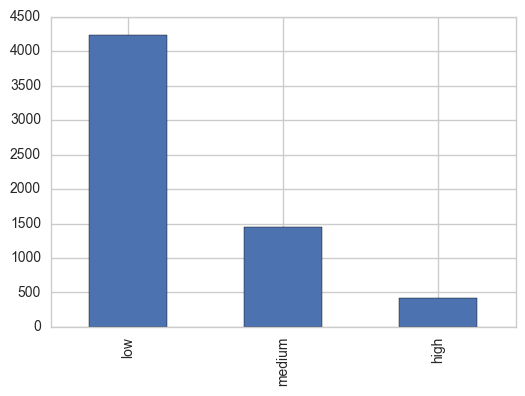

In [219]:
word = 'modern'
test = train
test['word_'] = [True if word in x.lower() else False for x in test.description]
test[test.word_==True].interest_level.value_counts().plot(kind='bar')

(array([  3.13000000e+02,   4.00670000e+04,   7.93700000e+03,
          8.15000000e+02,   1.88000000e+02,   2.50000000e+01,
          5.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

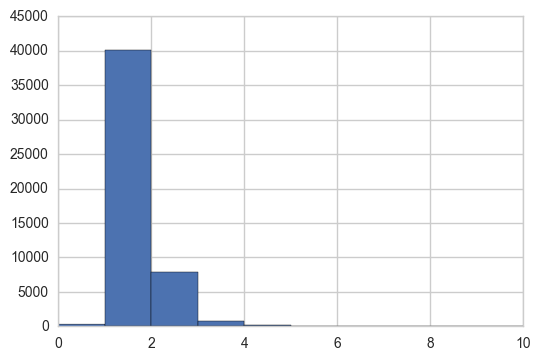

In [181]:
plt.hist(train.bathrooms)

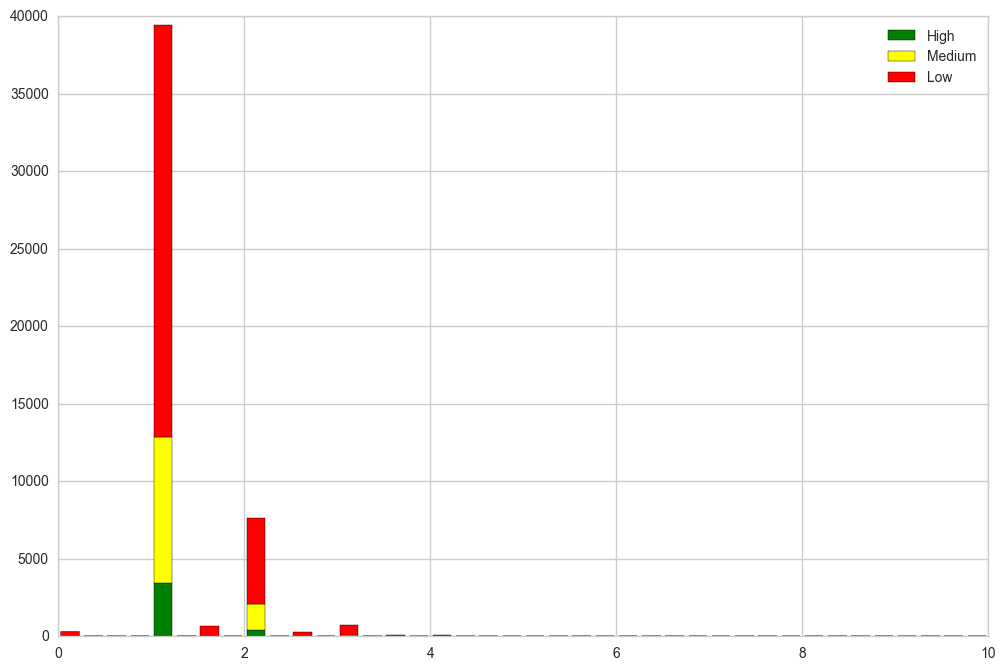

In [182]:
train_=train[(train.price<20000)&(train.price>400)]
high=train_[train_.interest_level=="high"]
medium=train_[train_.interest_level=="medium"]
low=train_[train_.interest_level=="low"]
plt.figure(figsize=(12,8))
_ = plt.hist([high.bathrooms, medium.bathrooms, low.bathrooms], stacked=True, color=['green', 'yellow', 'red'], bins=40)
plt.legend(['High', 'Medium', 'Low'])

In [183]:
train.bathrooms.value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
10.0        1
7.0         1
Name: bathrooms, dtype: int64

In [231]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.cross_validation import train_test_split